# 90 Minutes To Machine Learning

## Why are we here?
1. Intro to the Codeup experience
2. Big Picture overview of Data Science
3. Intro to Machine Learning concepts and tools including:
    - Exposure to Python
    - Data acquisition and preparation
    - Data visualization
    - Building a predictive model w/ Scikit-Learn
    - Evaluating how well a predictive model performs

## Why Codeup?
- Focus on student outcomes
- Placement services and quality of network
- Immersion works. Full-time, live instruction for 5 months works.
- Projects simulate the work environment from real world data to presenting findings to stakeholders

## What is Data Science?
- Interdisciplinary applied science intersecting programming, statistics, and domain expertise
- The application of the scientific method of hypothesis -> experiment -> analyze -> repeat to analyze and infer outcomes from data.
- A broad description of approaches ranging from business analysis and visualizations to machine learning and deep neural network analysis.
![](drawn_ds_venn_diagram.png)

## How Does Data Science Relate to Traditional Software and Data Analysis?
![](data_science_venn_diagram_with_overlapping_disciplines.png)

## What is Machine Learning?
- Machine Learning is the process of using previous data as the fuel for determining rules for making predictions of outcomes from future data.
- Classical programming takes business rules and data to produce answers. Ex. TurboTax software.
- Machine learning takes in data (and sometimes answers/labels for some data) and produces rules or predictions for future data. The example here is text message autocomplete.

<img src="classical_programming_vs_machine_learning.jpeg" width=500>

## Where does Machine Learning Fit Into Data Science?

![example data science pipepine and product](example_data_science_project.png)


## Challenges of Machine Learning
- Poor quality data
- Insufficient quantity of data
- Nonrepresentative data
- Bias in, Bias out:
    - [Cognitive Biases](https://en.wikipedia.org/wiki/List_of_cognitive_biases) arise from being human.
    - [Statistical Biases](https://en.wikipedia.org/wiki/Bias_(statistics)) arise from our methodologies. These have to do with how data is collected, how people respond, etc...
- Whatever Machine Learning "learns", it will keep doing. There is no cognition or intelligence, only pattern recognition and optimization.

## What kind of ML will we doing today?
- We'll be using a decision tree classifier to predict whether or not we should expect employees to quit a company.
- Classification machine learning is used all the time for such things as:
    - Facial recognition
    - Handwriting recognition and conversion to typed text
    - Recommendation engines for new music or movies 
- Classification is a "supervised learning" type of machine learning. That means we train the algorithm on existing data to learn a rule, a recognized pattern, to apply to future data.

## How does a decision tree work:
- Decision Trees work like playing [20 questions](https://en.wikipedia.org/wiki/Twenty_questions) with our features and our target variable.    
- Classification algorithms use training data to measure the distance between points or the distance around boundaries between points.
- By "learning" the pattern recognition around sets of points, the classifier produces a "decision rule" to use to apply to classify new incoming data.

#### Consider this diagram of a decision tree used to predict iris species w/ petal measurements 
![decision tree diagram](decision_tree_diagram.png)

# Planning Stage
- In this scenario, you are a Data Scientist at a company and your supervisor says:

_The Human Resources department needs your help. We know that employee attrition is expensive. It's bad for culture, and it costs a lot of time and money to recruit, hire, and onboard new employees. Here is a spreadsheet export of some of our HR information we have on employees. We need you to determine the predictors of an employee staying or leaving. What are the best predictors of attrition? Are the employee survey responses good indicators if people leave?_

### Critical Planning Questions?
- What's the business goal here?
- Who are the stakeholders?
- Why is this important to the business?
- What does our input data look like? 
- What is the thing we're trying to predict?
- What is our target variable, exactly?
- What are our predictor variables?

### Our Plan for this Dataset:
- Overall goal: Predict if a particular employee is going to leave the organization.
- Once we acquire the data, we'll need to clean/prepare it as much as necessary.
- Define the target variable
- Split the data to have in-sample and out-of-sample data for our modeling.

### Data Dictionary 
- A data dictionary explains the columns in a dataset and what the values in those columns mean. 
- In this dataset, here's what things mean:
    - `Attrition` specifies if this specific employee left the company or is still with the company.
    - `MonthlyIncome` is that employee's monthly salary figure.
    - `Education` is a number value meaning the academic background of the employee: 
        1. No college
        2. Some college
        3. Bachelor degree
        4. Master's degree
        5. PhD level
    - `WorkLifeBalance` is a number value the employee reported on a company survey meaning:
        1. "Bad"
        2. "Good"
        3. "Better"
        4. "Best"
    - `JobSatisfaction` is a number value the employee reported on a company survey meaning:
        1. "Low"
        2. "Medium"
        3. "High"
        4. "Very High"
    - `PercentSalaryHike` is the percentage increase in salary since last year.
    - `BusinessTravel` specifies if the employee travels frequently, rarely, or never

# Show Me The Code!

In [5]:
# Data Processing and Data Cleaning Libraries
import pandas as pd
import numpy as np

# Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing
from sklearn.model_selection import train_test_split

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report

In [6]:
# We'll use this split function later to create in-sample and out-of-sample datasets for modeling
def split(df, stratify_by=None):
    """
    3 way split for train, validate, and test datasets
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

# Data Acquisition Stage

Python and its powerful code libraries like pandas allow us to easily acquire and clean data.

In [41]:
# Acquire our data from a Comma Separated Values text file exported from a spreadsheet in Human Resources.
df = pd.read_csv("data.csv", index_col="index")

# Get a sense of what each row/observation means
# See what columns we have to work with for this
# Our columns will be our features
df.head()

,Attrition,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,BusinessTravel
index,,,,,,,
0,Yes,5993,2,1,4,11,Travel_Rarely
1,No,5130,1,3,2,23,Travel_Frequently
2,Yes,2090,2,3,3,15,Travel_Rarely
3,No,2909,4,3,3,11,Travel_Frequently
4,No,3468,1,3,2,12,Travel_Rarely


# Data Preparation Stage
- Machine Learning algorithms can only work on numbers, so we need to convert some of our columns into numbers.
- For example, the `Attrition` column only has 2 different values, so we will convert those "Yes" or "No" strings into 0 and 1s to represent True and False and so our Machine Algorithms can operate on them.
- The `BusinessTravel` column has 3 values, but "rarely" is close enough to "never", so we'll make this a binary too.
- In practice, real world data is _much_ messier than this example dataset.
- In industry, the data preparation stage is _critical_ because machine learning algorithms only work on numbers. When any machine learning is working with words, picture, sound, or video, everything has to be converted into numbers.

In [42]:
# We'll map "Yes" to True and "No" to false for the Attrition column
df.Attrition = df.Attrition.apply(lambda x: 1 if x == "Yes" else 0)

# Clean up other column names
df = df.rename(columns={"BusinessTravel": "FrequentTravel"})
df.FrequentTravel = df.FrequentTravel.apply(lambda x: 1 if x == "Travel_Frequently" else 0)

df.head()

,Attrition,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,FrequentTravel
index,,,,,,,
0,1,5993,2,1,4,11,0
1,0,5130,1,3,2,23,1
2,1,2090,2,3,3,15,0
3,0,2909,4,3,3,11,1
4,0,3468,1,3,2,12,0


# Exploration Phase (Exploratory Data Analysis)
- Exploratory Data Analysis (EDA) is where we learn about our data and discover:
    - What each of the varibles looks like in detail 
    - How the variables in our dataset relate to each-other
    - Most of our takeaways and insights to deliver to stakeholders
- The main tasks in EDA include:
    - Getting to know the 
    - Exploring descriptive statistics
    - G
    - inferential statistics and hypothesstatistical testing
- Exploratory Data Analysis is where data scientists, statisticians, and analysts overlap a _lot_.
- We use Machine Learning to make predictive models for the future, but EDA is where we:
    - Really and truly get to _know_ our data
    - Discover a snapshot or the history of our data

- The Explore stage is where we discover most of our insights
- It's _easy_ to spend a lot of time on Exploratory Data Analysis, so we'll stay high-level

In [102]:
# Let's get to know the Monthly Income information
df.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:>

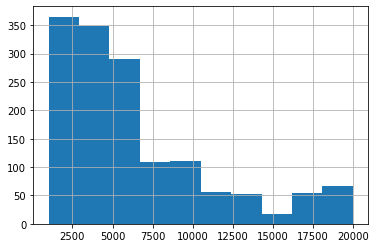

In [69]:
# Let's visualize the distribution of employee Monthly Income
df.MonthlyIncome.hist()

In [71]:
# What is the distribution of employees who leave vs. stay?
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

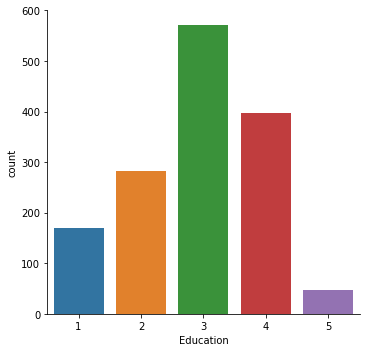

In [90]:
# How many employees have which kind of educational level?
sns.catplot(x="Education",  data=df, kind="count")

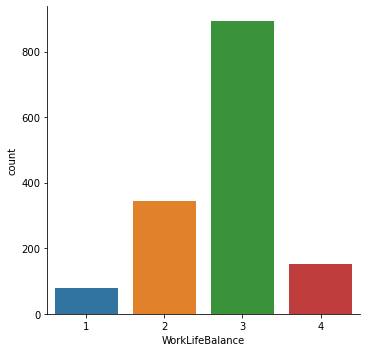

In [89]:
# How many employees self report 
# Remember that self-reporting is a statistical bias
sns.catplot(x="WorkLifeBalance",  data=df, kind="count")

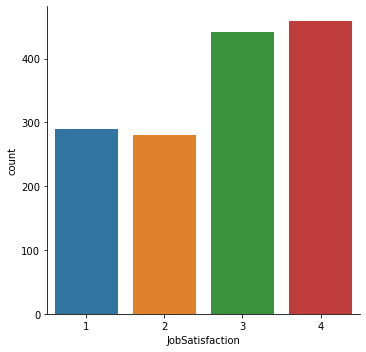

In [88]:
# Let's see how many employees report for the different job satisfaction levels
# Remember that self-reporting is a statistical bias
# Looks like most people are 3s and 4s. 
sns.catplot(x="JobSatisfaction",  data=df, kind="count")

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

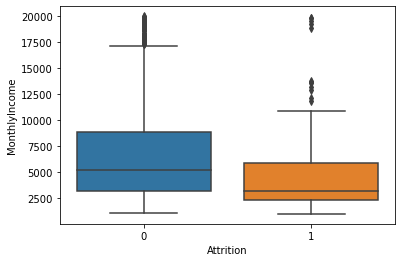

In [78]:
# Do employees who stay get paid more? 
# Let's compare the distributions of Monthly Income between employees who stayed vs. left
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)

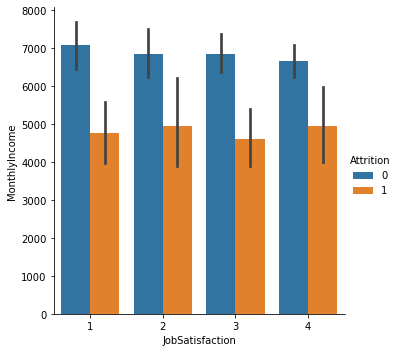

In [91]:
sns.catplot(x="JobSatisfaction", y="MonthlyIncome", data=df, hue="Attrition", kind="bar")

## What can we see in the chart(s) above?
- Looks like employees who leave have lower pay
- Employees reporting "Job Satisfaction" who leave 

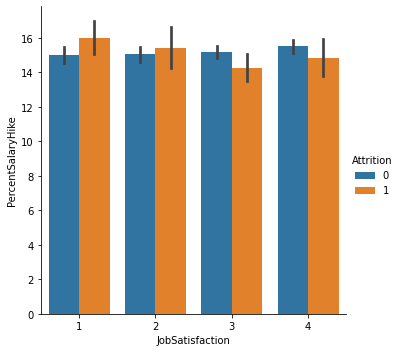

In [93]:
sns.catplot(x="JobSatisfaction", y="PercentSalaryHike", data=df, hue="Attrition", kind="bar")

## Exploratory Data Analysis (EDA) can take a bit of time. 
- We need to get to know each of our different variables each independently and how they interact with eachother. 
- There are at _least_ 3 statistical ways to calculate "the middle" of a list of numbers...
- This is where there's _tons_ of:
    - descriptive statistics
    - data visualizations
    - different types of aggregating and comparing the data
    - statistical hypothesis testing
- This process involves _far_ more than we have time to get into today!!
- Here's are the takeaways for Exploratory Data Analysis:
    - This is where we learn the most from our data
    - This is where we apply all of our statistical chops
    - This is where we apply all ouf our data visualization 
    - This is where we play detective w/ all of the different relationships w/ the 

# Onto the Modeling!
